In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run startup.py
from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
import matplotlib.pyplot as plt
from copy import deepcopy
import pandas as pd
import numpy as np

In [2]:
j = Joint(20_000, 500_000)
n = 4
joints = [j]*n
signs = [1]*n


def rand_move(axis):

    z = int(random() < .9) # Make 10% of the moves zero    
    signs[axis] = -signs[axis] if random() < .05 else signs[axis] # change direction 10% of the time

    return z * signs[axis] * randint(8,10)*100


for i in range(10):
    print( f"sl.move({[rand_move(a) for a in range(n)]})" )


sl.move([800, 800, 900, 900])
sl.move([1000, 1000, 800, 900])
sl.move([800, 0, 1000, 800])
sl.move([1000, 800, 800, 1000])
sl.move([0, 1000, 900, 0])
sl.move([1000, 900, 800, 900])
sl.move([1000, 900, 900, 900])
sl.move([1000, 1000, 800, 0])
sl.move([900, 800, 900, 900])
sl.move([800, 1000, 800, 1000])


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


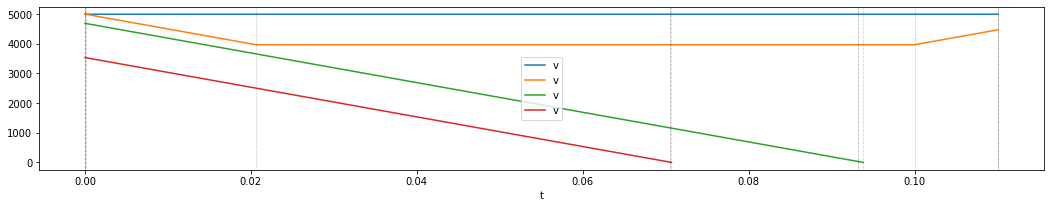

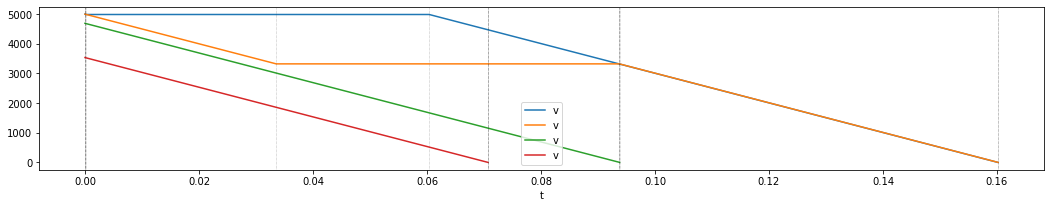

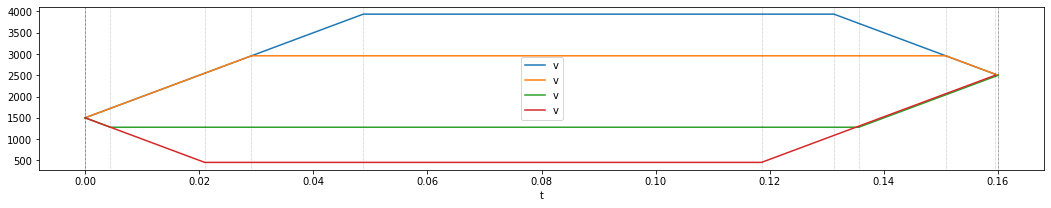

In [3]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4
sl = SegmentList(joints)   

sl.move([550, 450, 220, 125])
#sl.move([141, 76, -475, 391])


sl[0].plan(v_0=j.v_max, v_1=j.v_max)
sl.plot()
sl[0].plan(v_0=j.v_max, v_1=0)
sl.plot()
sl[0].plan(v_0=1500, v_1=2500)
sl.plot()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


N Discont,0
Replans,"[(2, 1)]"
N Replans,18
Errors,[]
Reductions,[]


<Figure size 432x288 with 0 Axes>

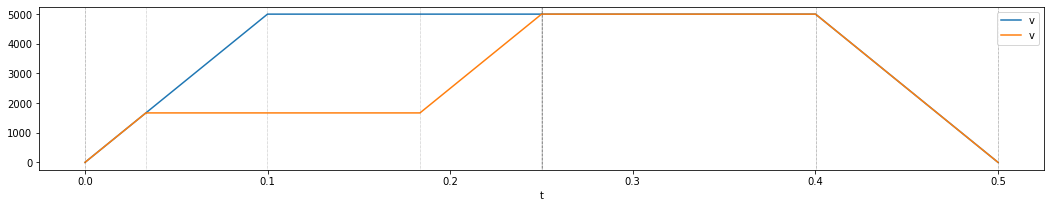

In [4]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run startup.py
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)   
s = sl.move([1000,500])
s = sl.move([1000,1000])

report(sl)

sl.plot()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


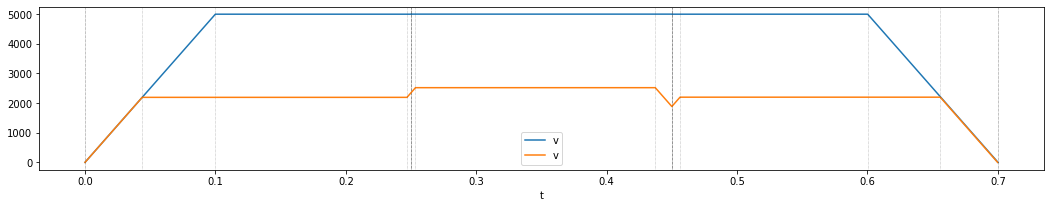

In [5]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pylab as plt
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)   
s = sl.move([1000,500])
s = sl.move([1000,500])
s = sl.move([1000,500])
sl.plot(); plt.show()




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[]
[(4, 6), (2, 3)]
404
Counter()
Counter()


<Figure size 432x288 with 0 Axes>

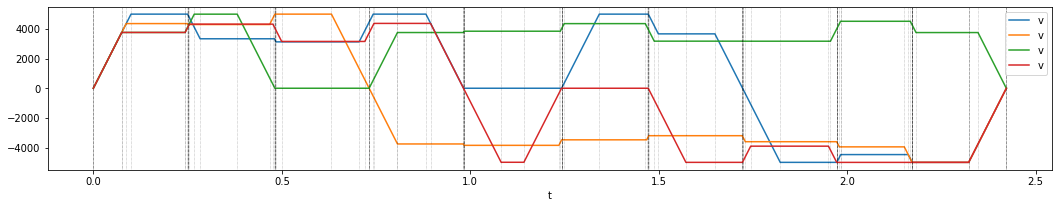

In [6]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run startup.py

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4

sl = SegmentList(joints)  

sl.move([1000, 900, 800, 800])
sl.move([800, 1000, 900, 1000])
sl.move([800, 1000, 0, 800])
sl.move([1000, -800, 800, 900])
sl.move([0, -1000, 1000, -800])
sl.move([900, -800, 1000, 0])
sl.move([800, -800, 800, -1000])
sl.move([-1000, -900, 800, -1000])
sl.move([-900, -800, 900, -1000])
sl.move([-1000, -1000, 800, -1000])



sl.plot()


print([ (c.id, round(c.v_1), round(n.v_0)) for c, n in sl.discontinuities()])
print(Counter(sl.replans).most_common(10))
print(sum([b.replans for b in  sl.blocks]))
print(Counter(chain(*[b.errors for b in sl.blocks])))
print(Counter(chain(*[b.reductions for b in sl.blocks])))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[]
[(2, 6), (4, 3)]
352


<Figure size 432x288 with 0 Axes>

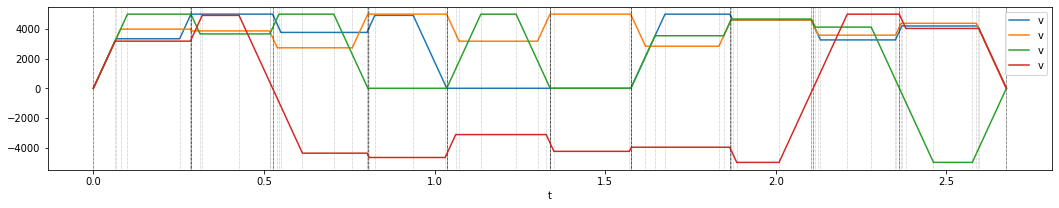

In [7]:
# Too many planning updates for sid=1.
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run startup.py

from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4

sl = SegmentList(joints)  

sl.move([871, 981, 1180, 808])
sl.move([1196, 923, 896, 907])
sl.move([1067, 818, 1137, -1030])
sl.move([885, 1156, 0, -1078])
sl.move([0, 1028, 1015, -967])
sl.move([0, 1183, 0, -1003])
sl.move([1200, 894, 910, -1153])
sl.move([1125, 1124, 1139, -961])
sl.move([838, 913, 872, 1012])
sl.move([1140, 1182, -1068, 1112])

sl.plot()


print([ (c.id, round(c.v_1), round(n.v_0)) for c, n in sl.discontinuities()])
print(Counter(sl.replans).most_common(10))

print(sum([b.replans for b in  sl.blocks]))

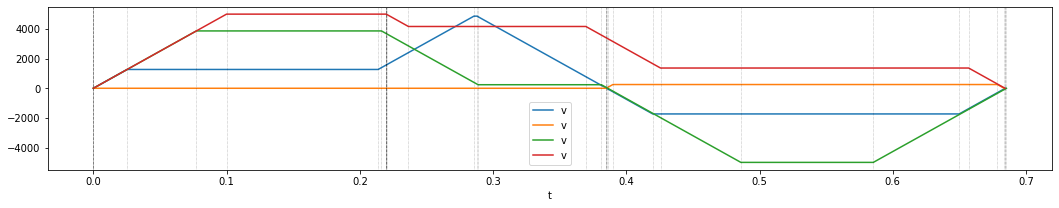

In [8]:
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4

sl = SegmentList(joints) 

sl.move([264, 0, 700, 849])
sl.move([459, 0, 158, 689])
sl.move([-458, 74, -996, 431])

sl.plot()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


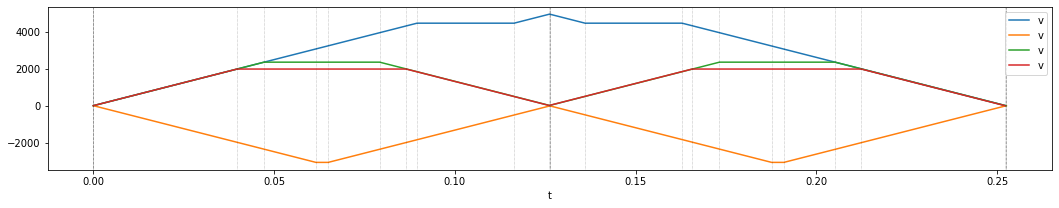

In [9]:
# Unsolvable profile. Changing the first move distance by 1 avoids the error. 
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4
sl = SegmentList(joints)


sl.move([367, -200, 187, 172])
sl.move([367, -200, 187, 172])


sl.plot()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


N Discont,0
Replans,"[(0, 1), (4, 1)]"
N Replans,72
Errors,[]
Reductions,[]


<Figure size 432x288 with 0 Axes>

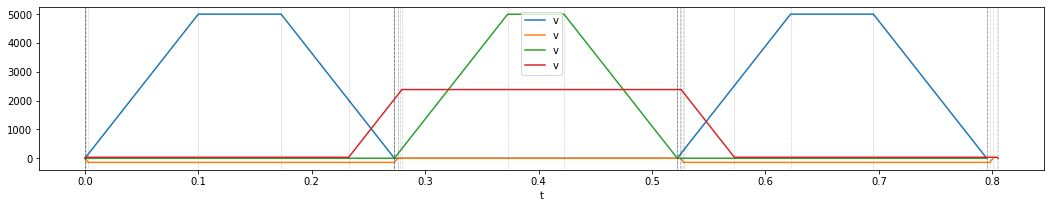

In [10]:
# Unsolvable profile. Changing the first move distance by 1 avoids the error. 
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run startup.py
from trajectory.planner import Segment, SegmentList, Joint

j = Joint(5_000, 50_000)
joints = [j]*4
sl = SegmentList(joints)

sl.move([864, -39, 0, 61])
sl.move([0, 0, 747, 594])
sl.move([864, -39, 0, 61])


sl.plot()
report(sl)

N Discont,0
Replans,"[(0, 5)]"
N Replans,42
Errors,[]
Reductions,[]


<Figure size 432x288 with 0 Axes>

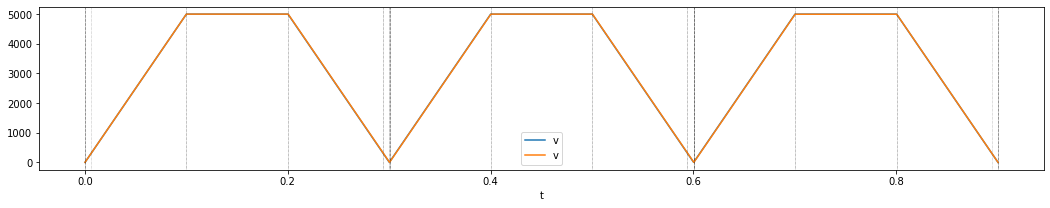

In [11]:
%reload_ext autoreload
%autoreload 2
%run startup.py
from trajectory.planner import Joint, SegmentList

j = Joint(5_000, 50_000)
joints = [j]*2

sl = SegmentList(joints)   
s = sl.move([1000,1])
s = sl.move([1,1000])
s = sl.move([1000,1])
s = sl.move([1,1000])
s = sl.move([1000,1])
s = sl.move([1,1000])

sl.plot()
  
report(sl)

## R=1000 N=50 Tmean = 0.04159140999999999

<Figure size 432x288 with 0 Axes>

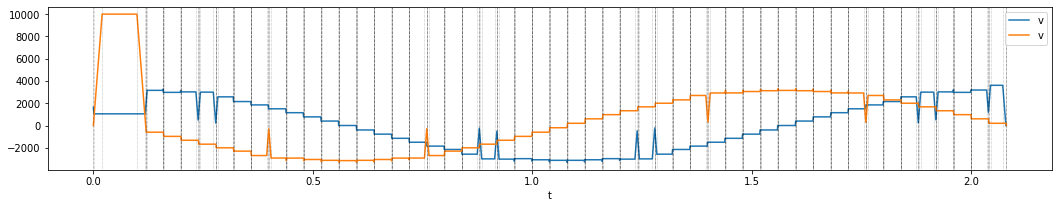

N Discont,0
Replans,"[(4, 48), (3, 1)]"
N Replans,1176
Errors,[]
Reductions,[]


## R=2000 N=50 Tmean = 0.04359290999999999

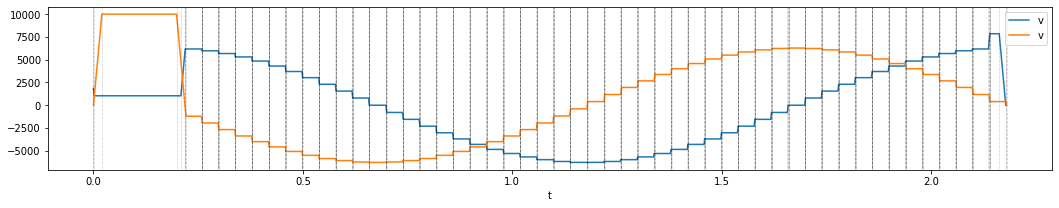

N Discont,0
Replans,"[(4, 47), (3, 1), (2, 1)]"
N Replans,1168
Errors,[]
Reductions,[]


## R=3000 N=50 Tmean = 0.04572961

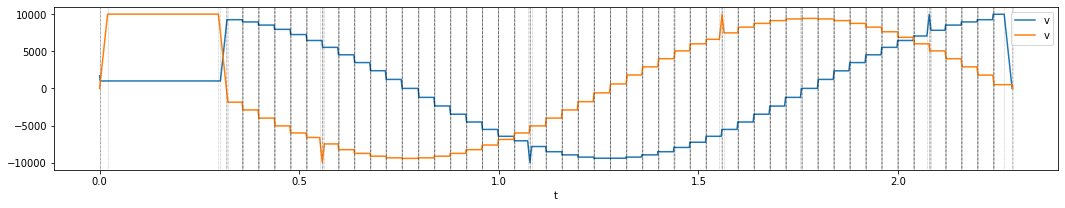

N Discont,0
Replans,"[(4, 46), (2, 2), (3, 1)]"
N Replans,1160
Errors,[]
Reductions,[]


## R=4000 N=50 Tmean = 0.05314183999999999

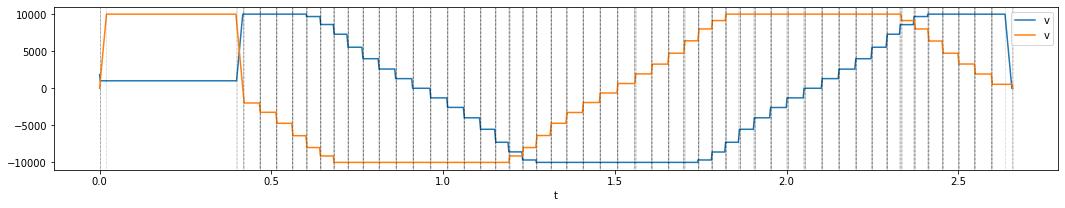

N Discont,0
Replans,"[(4, 41), (2, 7), (3, 1)]"
N Replans,1120
Errors,[]
Reductions,[]


## R=5000 N=50 Tmean = 0.06583254999999999

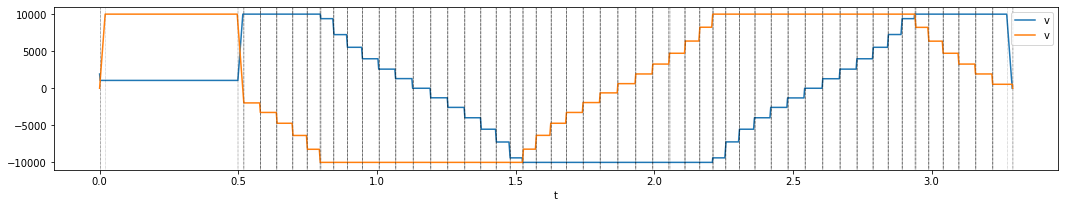

N Discont,0
Replans,"[(4, 43), (2, 5), (3, 1)]"
N Replans,1140
Errors,[]
Reductions,[]


## R=6000 N=50 Tmean = 0.07889473

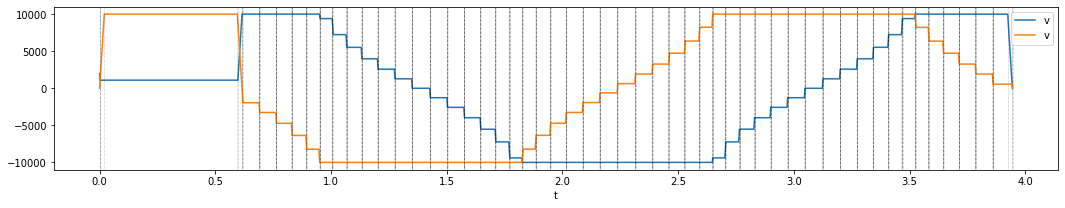

N Discont,0
Replans,"[(4, 43), (2, 5), (3, 1)]"
N Replans,1136
Errors,[]
Reductions,[]


## R=7000 N=50 Tmean = 0.09188431000000001

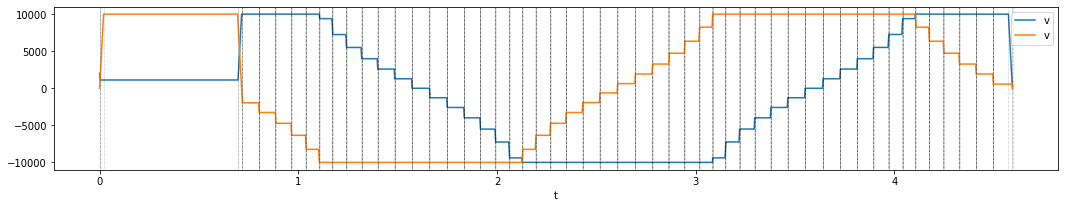

N Discont,0
Replans,"[(4, 43), (2, 5), (3, 1)]"
N Replans,1192
Errors,[]
Reductions,[]


In [16]:
##
## Circle
##

%reload_ext autoreload
%autoreload 2
%run startup.py
from math import sin, cos, sqrt
from trajectory.planner import Segment, SegmentList, Joint
from trajectory.plot import * 

def make_circle(r=1000, n=100):
    j = Joint(10_000, 500_000)
    joints = [j]*2

    sl = SegmentList(joints)   
    r = r
    n = n
    lx  = 0
    ly = 0
    for i in range(1,n+1):
        a = 2*np.pi*(i/n)
        x = sin(a)*r 
        y = cos(a)*r 
        
        sl.move((round(x-lx),round(y-ly)))
        lx = x
        ly = y
            
    t_m = np.mean(list(chain(*[s.times for s in sl])))
    display(Markdown(f"## R={r} N={n} Tmean = {t_m}"))     

    sl.plot();plt.show()
    report(sl)
    return sl
    
    
for r in range(1000,8000, 1000):
    make_circle(r, 50)

<Figure size 432x288 with 0 Axes>

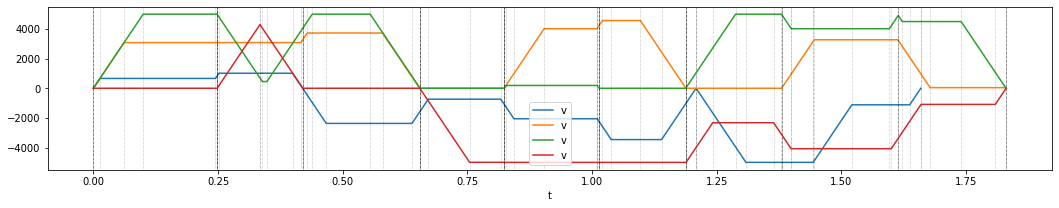

In [13]:
%reload_ext autoreload
%autoreload 2
%run startup.py
# Serious discontinuities. 
from trajectory import * 

j = Joint(5_000, 50_000)
joints = [j]*4
sl = SegmentList(joints)   
sl.move([160, 669, 991, 0])
sl.move([163, 529, 414, 369])
sl.move([-494, 733, 914, 0])
sl.move([-133, 0, 0, -596])
sl.move([-383, 606, 35, -955])
sl.move([-528, 583, 0, -868])
sl.move([-11, 0, 710, -524])
sl.move([-924, 658, 957, -940])
sl.move([-379, 110, 771, -275])


sl.plot()

<Figure size 432x288 with 0 Axes>

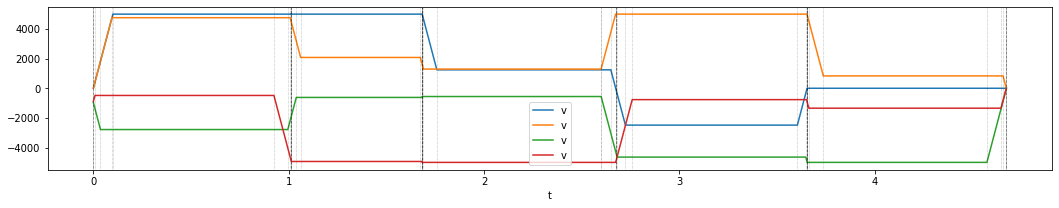

In [15]:
%reload_ext autoreload
%autoreload 2
%run startup.py

from trajectory.planner import Joint, SegmentList
from trajectory.plot import *
from random import random, randint
from IPython .display import Markdown

j = Joint(5_000, 50_000)
n = 4
joints = [j]*n
signs = [1]*n


test_moves = [
    [[4809, 4588, -2778, -685], [3358, 1454, -434, -3317], [1358, 1419, -693, -4952], [-2312, 4900, -4550, -931], [0, 1017, -4850, -1351]],
    [[-634, 0, 970, 359], [-299, 0, 70, 795], [637, 0, 549, 33], [950, -803, 237, 199], [0, -139, 224, -760]],
    [[-619, -980, 340, -698], [-428, -162, 781, -76], [-313, -44, 0, -531], [295, 90, 934, -743], [781, 728, 734, -336]],
    [[347, 379, 316, 66], [373, 883, 0, 328], [578, 537, -762, 641], [66, 232, -616, 590], [246, 0, -611, 134]],
    [[798, 453, 0, 232], [474, 657, 0, 576], [0, -758, 330, 992], [-184, 371, 497, 597], [33, 248, 15, 576]],
    [[-334, -425, 0, -992], [-449, -827, -920, 0], [-499, -978, 465, -963], [-394, -657, 777, 0], [-903, -430, 45, -977]],
    [[0, 652, 0, -239], [-505, 393, -382, -747], [-103, 342, -911, -881], [-451, 391, -946, -97], [-832, 715, -498, -427]],
    [[4370, -1413, -4319, 3230], [1375, -1027, 3613, 473], [3295, -93, 555, 686], [3951, -363, 479, 1564], [516, -1085, 4433, 3405]],
]
    
test_moves = test_moves[:1]
    
def f(sl, move_sets):
    for i, moves in list(enumerate(move_sets)):
        sl.move(moves)
        
for i,moves in enumerate(test_moves):
    sl = SegmentList(joints)  
    f(sl, moves)
    ds = list(sl.discontinuities())
    if len(ds):
        display(Markdown(f'## {len(ds)} Discontinuities'))
        display(i,moves)
        df = sl.dataframe
        display([ (c.id, round(c.v_1), round(n.v_0)) for c, n in ds])
    sl.plot(); plt.show()